In [52]:
import matplotlib.pyplot as plt
import chess.pgn
import numpy as np 
import chess

pgn = open("../../data/lichess_elite_2020-06.pgn")

In [3]:
def get_base_vect(size):
    arr = [0 for i in range(size)]
    return np.array(arr)

def get_vect(board):
    pieces = [chess.PAWN, chess.KNIGHT, chess.BISHOP, chess.ROOK, chess.QUEEN, chess.KING]
    colors = [chess.WHITE, chess.BLACK]
    vect = get_base_vect(len(pieces)*2*64)
    for i in range(len(colors)):
        for e in range(len(pieces)):
            lst = board.pieces(color=colors[i], piece_type=pieces[e])
            for position in lst:
                vect[position*len(pieces)*2 + i*len(pieces) + e] = 1
    return vect

In [54]:
X, Y = [], []
Y_ = []



def process(game):
   count = 0
   if game.headers["Result"] == "1/2-1/2":
      return

   y = np.zeros((1))
   if game.headers["Result"] == "1-0":
      y[0] = 1.0

   board = game.board()

   for move in game.mainline_moves():
      board.push(move)
      count += 1
      if count%4 == 0:
         vect = get_vect(board)
         X.append(vect)
         Y.append(y)


for i in range(200000):
   game = chess.pgn.read_game(pgn)
   process(game)
   
   if i%1000 == 0:
      print(i, len(X))

print(len(X))

UnboundLocalError: local variable 'count' referenced before assignment

In [25]:
X = np.array(X)
Y = np.array(Y)

print(X.shape)
print(Y.shape)

np.save("F:\\Dataset\\chess\\X", X)
np.save("F:\\Dataset\\chess\\Y", Y)

(901262, 768)
(901262, 1)


In [49]:
import tensorflow.keras as keras

model = keras.Sequential()
#  kernel_regularizer=keras.regularizers.L1(0.001)
model.add(keras.layers.Dense(256, activation="tanh", input_shape=(len(X[0]),)))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(128, activation="tanh"))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(1, activation="sigmoid"))

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               196864    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 1)                 129       
                                                                 
Total params: 229,889
Trainable params: 229,889
Non-trainable params: 0
_________________________________________________________________


Epoch 1/14
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5271/5281 [============================>.] - ETA: 0s - loss: 0.6722 - accuracy: 0.5739WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001939A46F948> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=1

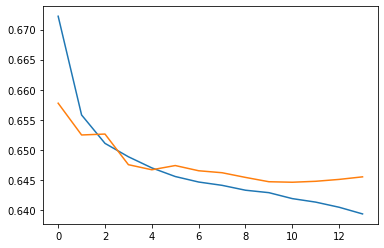

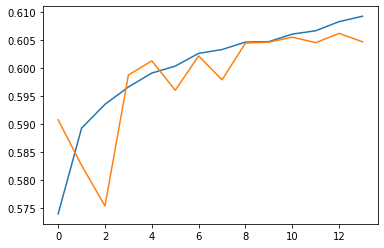

In [50]:
split = int(len(X)*0.75)

from sklearn.utils import shuffle
X_, Y_ = shuffle(X[0:split], Y[0:split], random_state=0)

hist = model.fit(X_, Y_, batch_size=128, epochs=14, validation_data=(X[split:len(X)], Y[split:len(Y)]),)

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.show()

In [51]:
model.save("model_ml.h5")